In [ ]:
library(readr)


In [ ]:
spaceship <- read_csv("/content/train (1).csv")

spec(spaceship)

Rows: 8693 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): PassengerId, HomePlanet, Cabin, Destination, Name
dbl (6): Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
lgl (3): CryoSleep, VIP, Transported

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  PassengerId = col_character(),
  HomePlanet = col_character(),
  CryoSleep = col_logical(),
  Cabin = col_character(),
  Destination = col_character(),
  Age = col_double(),
  VIP = col_logical(),
  RoomService = col_double(),
  FoodCourt = col_double(),
  ShoppingMall = col_double(),
  Spa = col_double(),
  VRDeck = col_double(),
  Name = col_character(),
  Transported = col_logical()
)

In [ ]:
head(spaceship)

PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
<chr>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
0001_01,Europa,FALSE,B/0/P,TRAPPIST-1e,39,FALSE,0,0,0,0,0,Maham Ofracculy,FALSE
0002_01,Earth,FALSE,F/0/S,TRAPPIST-1e,24,FALSE,109,9,25,549,44,Juanna Vines,TRUE
0003_01,Europa,FALSE,A/0/S,TRAPPIST-1e,58,TRUE,43,3576,0,6715,49,Altark Susent,FALSE
0003_02,Europa,FALSE,A/0/S,TRAPPIST-1e,33,FALSE,0,1283,371,3329,193,Solam Susent,FALSE
0004_01,Earth,FALSE,F/1/S,TRAPPIST-1e,16,FALSE,303,70,151,565,2,Willy Santantines,TRUE
0005_01,Earth,FALSE,F/0/P,PSO J318.5-22,44,FALSE,0,483,0,291,0,Sandie Hinetthews,TRUE


What we know:

almost half of these passengers were transported to another dimension during an anomaly
these records are from before the anomaly, and were recovered from the damaged computer system
it is possible to predict who was transported based off the information given
Interesting columns:

Transported - boolean - TRUE if transported, FALSE if not
HomePlanet - discrete
CryoSleep - boolean - TRUE if they were in cryo sleep in their cabin for the entire voyage, including when the anomaly occurred
Cabin - deck / num / side (port/starboard) - location on ship may have mattered if in cryo
Age - integer - discrete
Let’s start by graphing some of these variables to get a sense of the data.

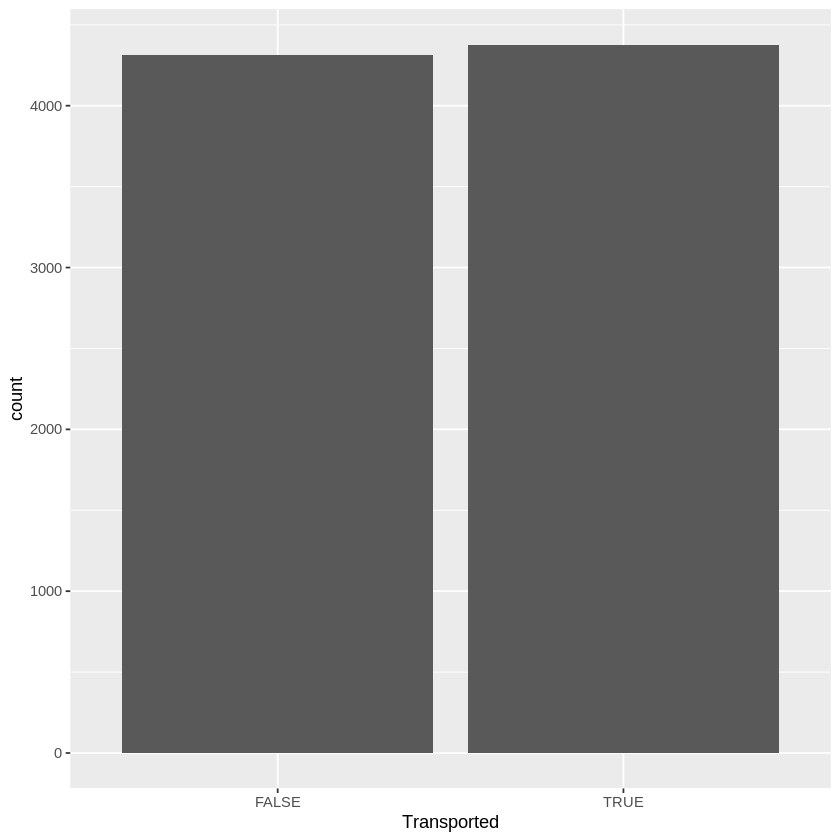

In [ ]:
# how many people were transported?
library(ggplot2)
ggplot(data = spaceship)+
  geom_bar(mapping = aes(x = Transported))

# passengers were very evenly split; about half were transported

Warning message:
“Removed 179 rows containing non-finite values (`stat_boxplot()`).”


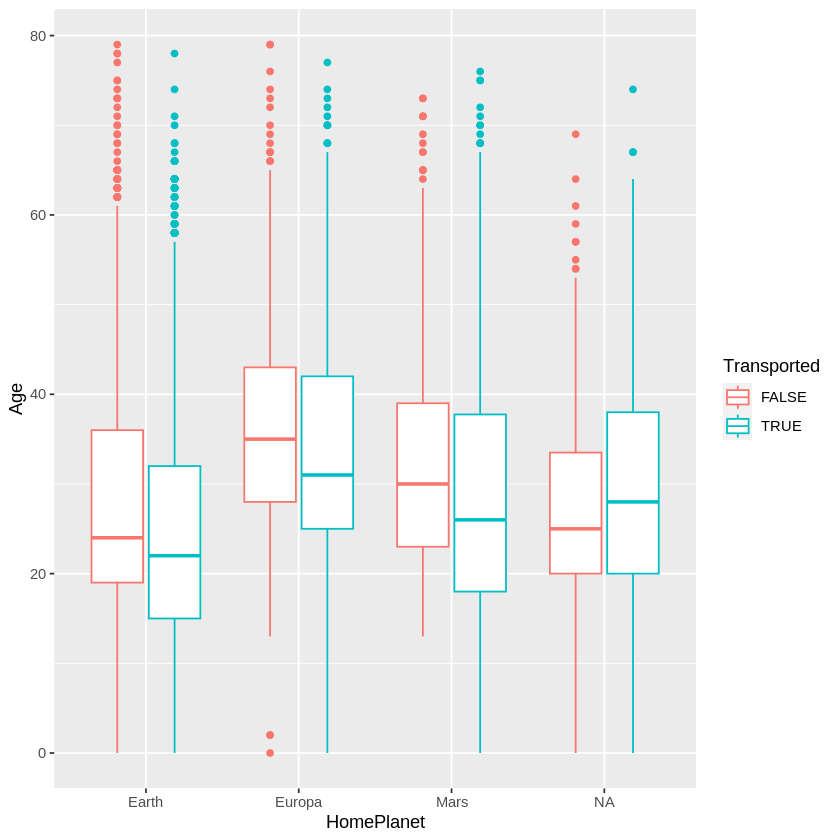

In [ ]:
# HomePlanet (discrete) vs. Age (continuous) (vs. Transported bool)
ggplot(data = spaceship) +
  geom_boxplot(mapping = aes(x = HomePlanet, y = Age, color = Transported))

# no trends jump out here

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 179 rows containing non-finite values (`stat_bin()`).”


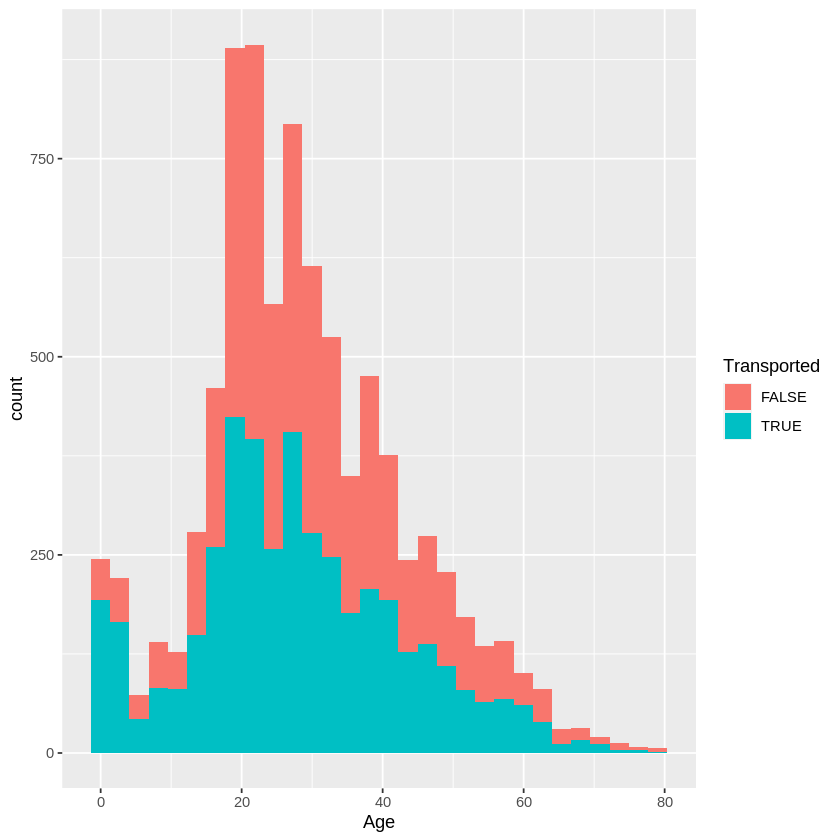

In [ ]:
# another way of visualizing age; histogram with transported line layered over?
ggplot(data = spaceship)+
  geom_histogram(mapping = aes(x = Age, fill = Transported))

# very young passengers seem to be more likely to be transported (<12)

Warning message:
“Removed 179 rows containing non-finite values (`stat_boxplot()`).”


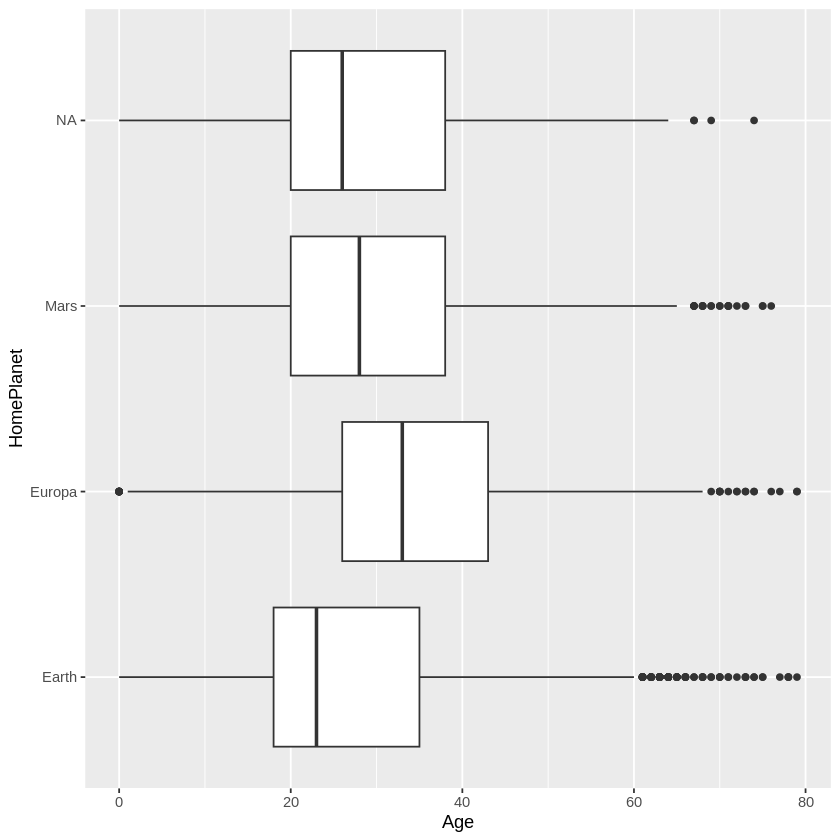

In [ ]:
# how about just age vs. home planet
ggplot(data = spaceship) +
  geom_boxplot(mapping = aes(x = Age, y = HomePlanet))

# oldest group was from Europa, youngest was Earth but there were many old outliers
# no strong trends in transported, slight trend towards younger crew, but not from any particular planet

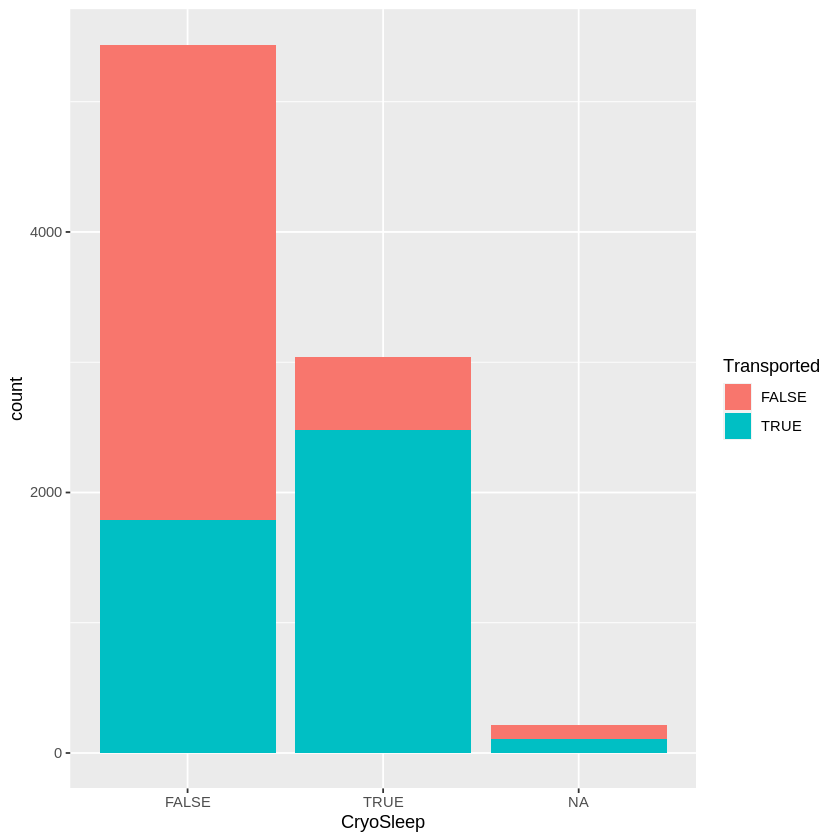

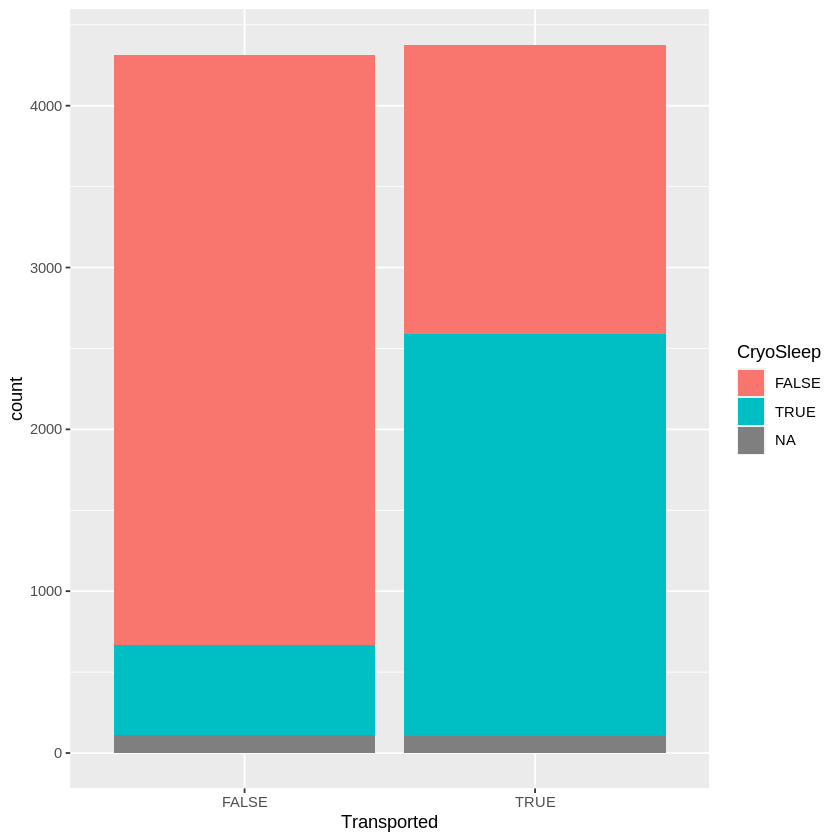

In [ ]:
# lets see what fraction of cryo and non cryo got transported
ggplot(data = spaceship) +
  geom_bar(mapping = aes(x = CryoSleep, fill = Transported))
# looks like those in cryo were significantly more likely to be transported!

# cryo sleepers made up a significant fraction of the transported passengers (~50-60%) even though they made up only about 1/3 of total passengers
ggplot(data = spaceship)+
  geom_bar(mapping = aes(x = Transported, fill = CryoSleep))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ stringr   1.5.1
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message in geom_bar(mapping = aes(x = Side, fill = Transported, na.rm = TRUE)):
“Ignoring unknown aesthetics: na.rm”
Warning message in geom_bar(mapping = aes(x = Deck, fill = Transported, na.rm = TRUE)):
“Ignoring unknown aesthetics: na.rm”


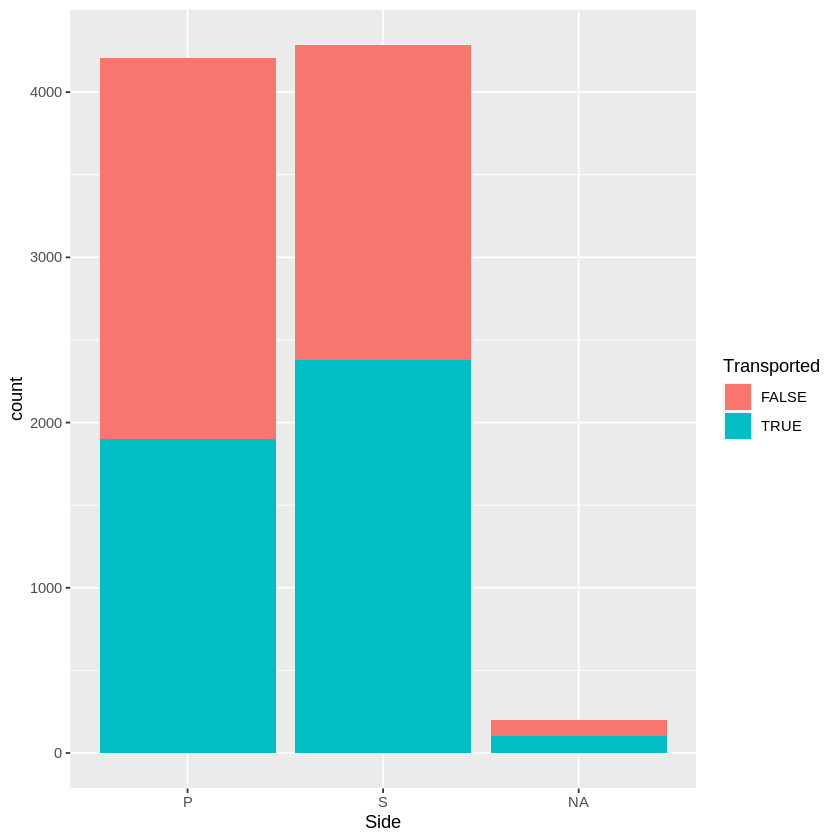

Warning message in geom_bar(mapping = aes(x = Deck, fill = Transported, na.rm = TRUE)):
“Ignoring unknown aesthetics: na.rm”


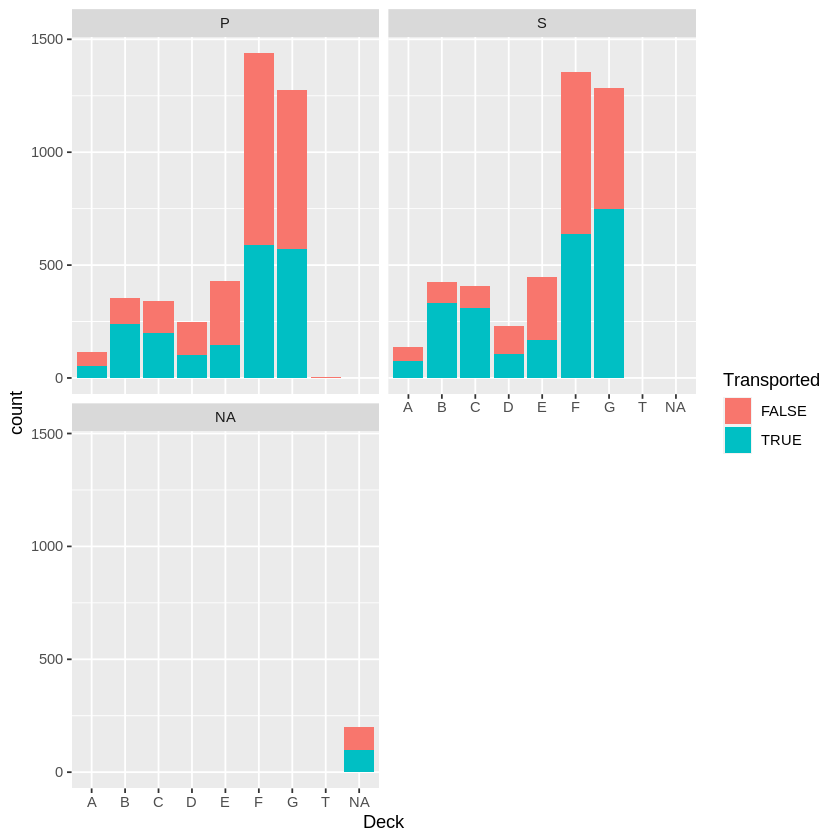

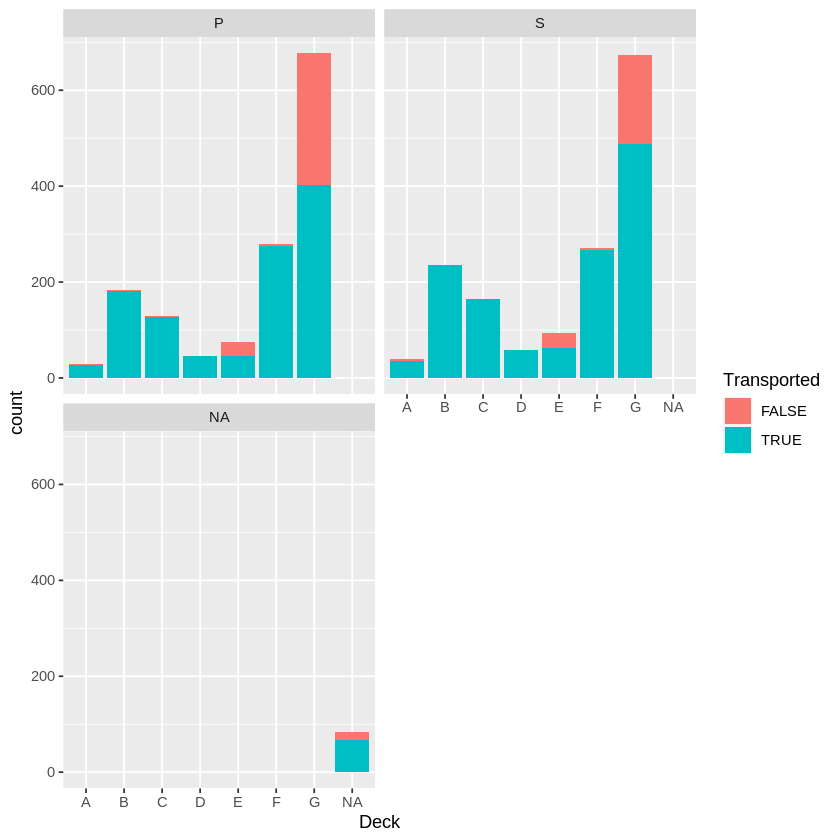

In [ ]:
# Load the tidyverse package (includes dplyr)
library(tidyverse)

# Separate Cabin column into Deck, Cabin Number, and Side
spaceship <- spaceship %>%
  separate(Cabin, c("Deck", "Cabin_Number", "Side"), sep = "/", remove=FALSE)

# Plotting cabin location vs. whether people were transported
ggplot(data = spaceship) +
  geom_bar(mapping = aes(x = Side, fill = Transported, na.rm = TRUE))

ggplot(data = spaceship) +
  geom_bar(mapping = aes(x = Deck, fill = Transported, na.rm = TRUE)) +
  facet_wrap(~Side, nrow = 2)

# Filter for passengers in cryo sleep
spaceship_cryo <- spaceship %>%
  filter(CryoSleep == TRUE)

# Plotting cabin location vs. whether people were transported for cryo passengers
ggplot(data = spaceship_cryo) +
  geom_bar(mapping = aes(x = Deck, fill = Transported, na.rm = TRUE)) +
  facet_wrap(~Side, nrow = 2)


Let’s explore the less obvious variables:

destination

VIP Status

amount spent on luxury amenities

Warning message in geom_bar(mapping = aes(x = Destination, fill = Transported, na.rm = TRUE)):
“Ignoring unknown aesthetics: na.rm”


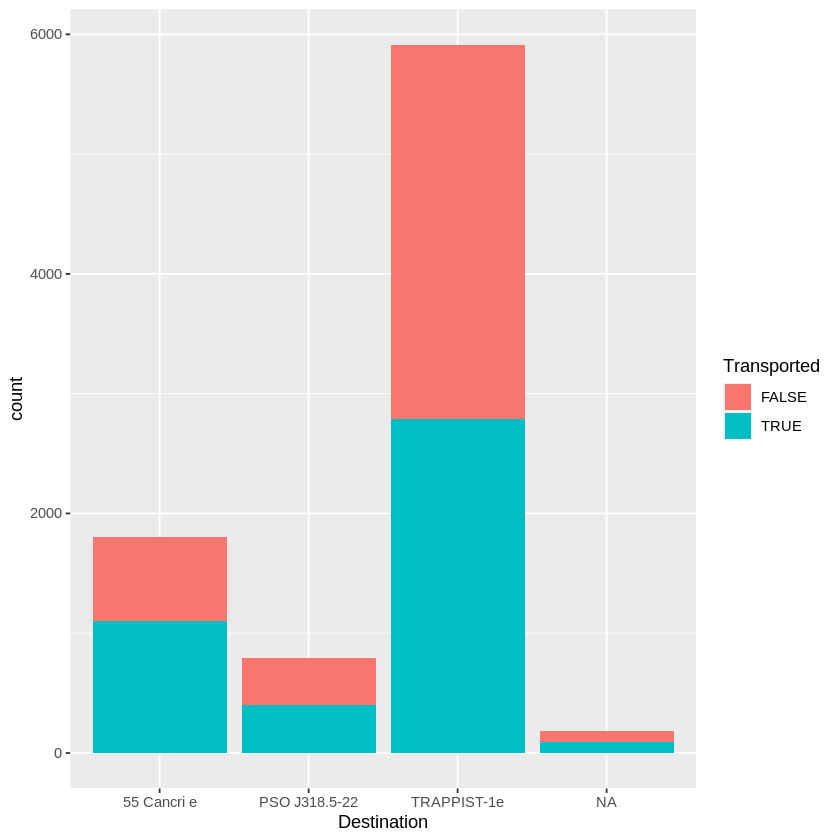

In [ ]:
# destination vs. transported
ggplot(data = spaceship)+
  geom_bar(mapping = aes(x = Destination, fill = Transported, na.rm = TRUE))

# transported passengers more or less evenly split between destinations

Warning message in geom_bar(mapping = aes(x = VIP, fill = Transported, na.rm = TRUE)):
“Ignoring unknown aesthetics: na.rm”


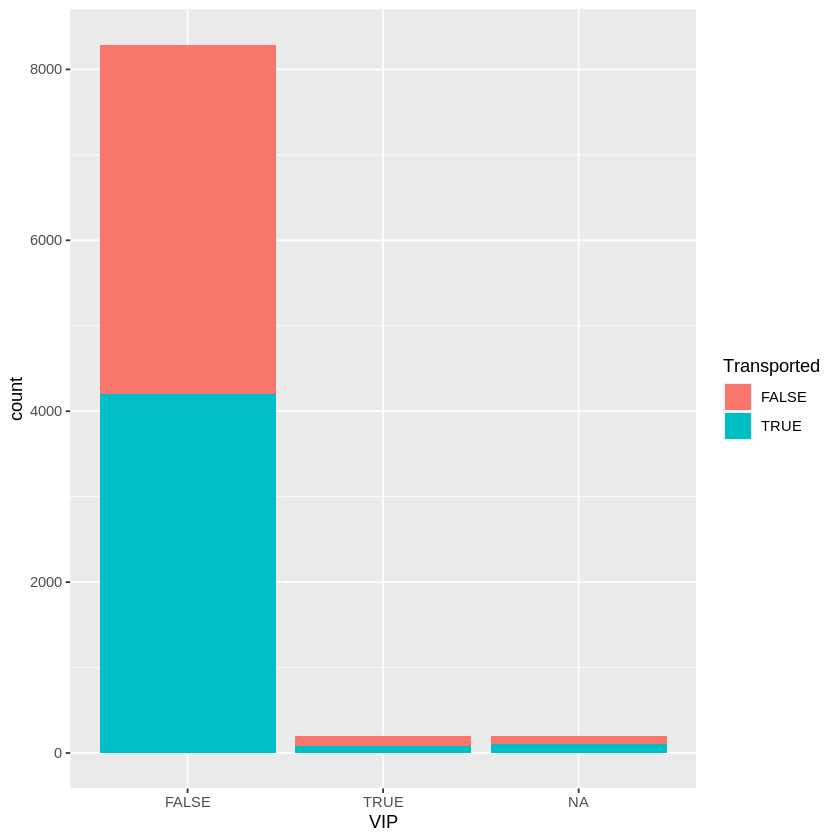

In [ ]:
# VIP
ggplot(data = spaceship)+
  geom_bar(mapping = aes(x = VIP, fill = Transported, na.rm = TRUE))

# no trend; evenly split

Warning message:
“Removed 537 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 537 rows containing missing values (`position_stack()`).”


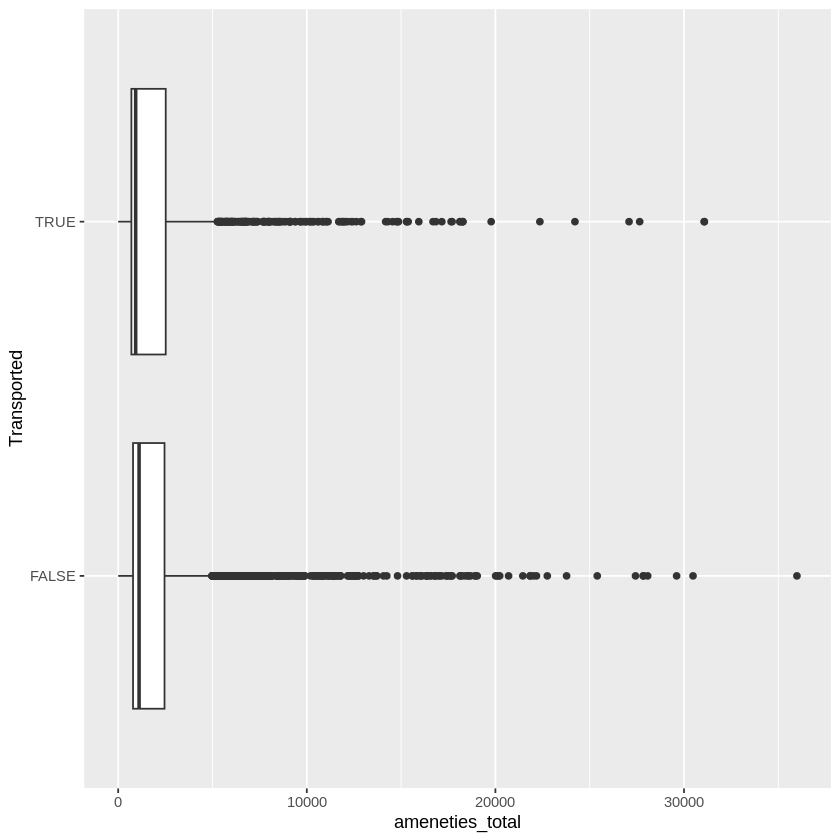

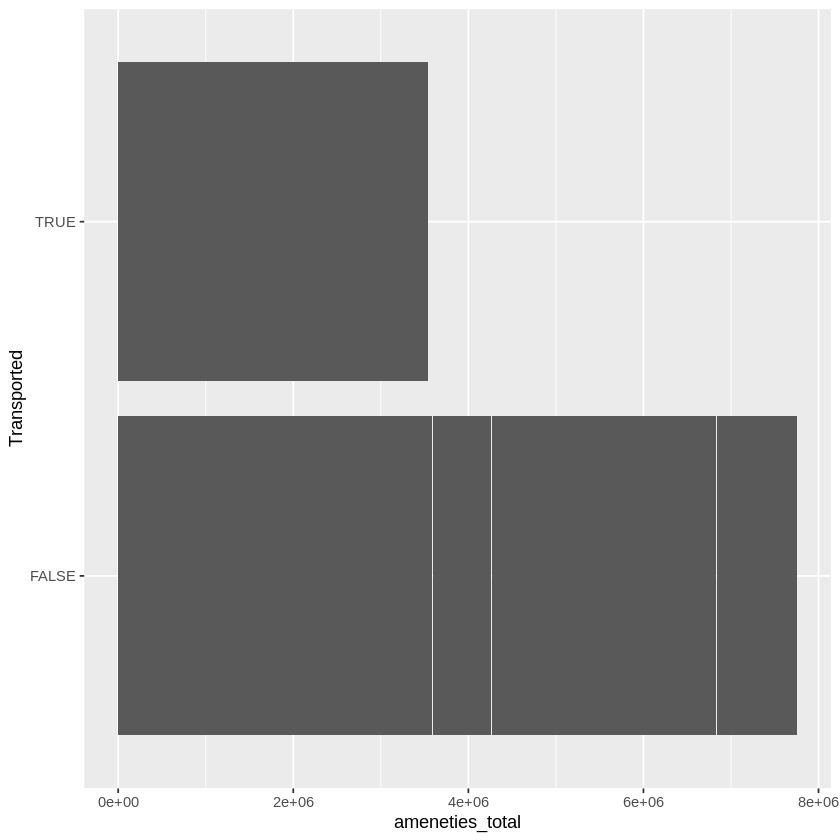

In [ ]:
# Room Services
# people in cryo didn't use room services
spaceship_awake <- spaceship %>%
filter(CryoSleep == FALSE)

spaceship_awake_ameneties <- spaceship_awake %>%
  mutate(spaceship_awake,
       ameneties_total = RoomService + FoodCourt + ShoppingMall + Spa + VRDeck
       )

ggplot(data = spaceship_awake_ameneties)+
  geom_boxplot(mapping = aes(x = ameneties_total, y = Transported))

ggplot(data = spaceship_awake_ameneties)+
  geom_col(mapping = aes(x = ameneties_total, y = Transported))

# this could be misleading if a few people spent a lot on ameneties and didn't get transported
# might be better to look at if a person spent money on ameneties at all, and which ameneties they frequented

In [ ]:
head(spaceship)

PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Cabin_Number,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>
0001_01,Europa,FALSE,B/0/P,B,0,P,TRAPPIST-1e,39,FALSE,0,0,0,0,0,Maham Ofracculy,FALSE
0002_01,Earth,FALSE,F/0/S,F,0,S,TRAPPIST-1e,24,FALSE,109,9,25,549,44,Juanna Vines,TRUE
0003_01,Europa,FALSE,A/0/S,A,0,S,TRAPPIST-1e,58,TRUE,43,3576,0,6715,49,Altark Susent,FALSE
0003_02,Europa,FALSE,A/0/S,A,0,S,TRAPPIST-1e,33,FALSE,0,1283,371,3329,193,Solam Susent,FALSE
0004_01,Earth,FALSE,F/1/S,F,1,S,TRAPPIST-1e,16,FALSE,303,70,151,565,2,Willy Santantines,TRUE
0005_01,Earth,FALSE,F/0/P,F,0,P,PSO J318.5-22,44,FALSE,0,483,0,291,0,Sandie Hinetthews,TRUE


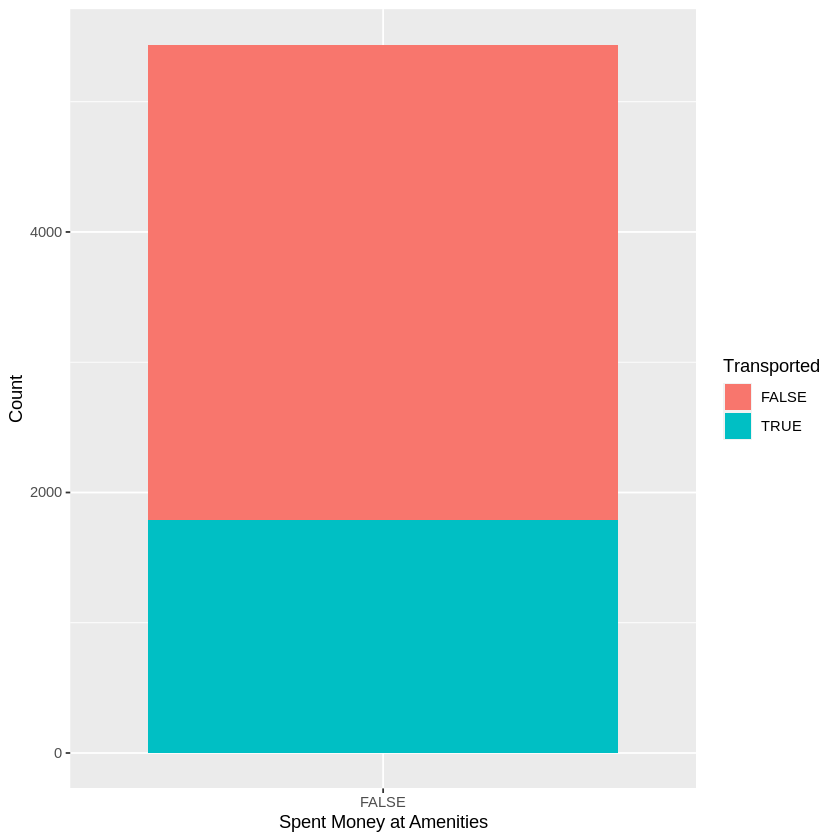

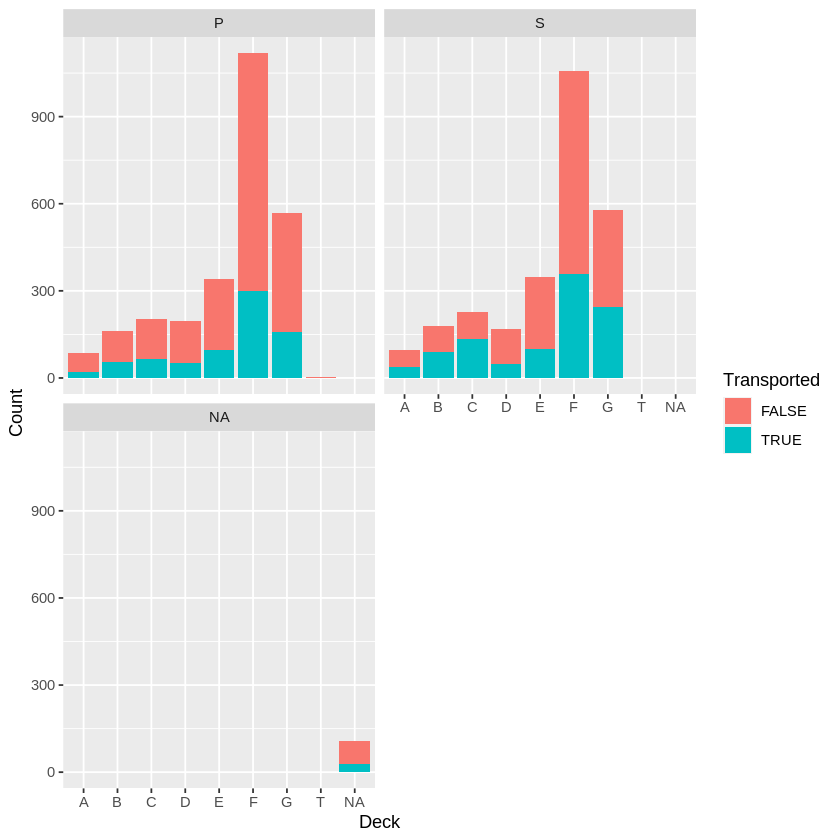

In [ ]:
# Load necessary libraries
library(tidyverse)

# Separate Cabin column into Deck, Cabin Number, and Side
spaceship <- spaceship %>%
  separate(Cabin, c("Deck", "Cabin_Number", "Side"), sep = "/", remove = FALSE)

# Create a boolean indicating if a person spent money at any amenity
spaceship_awake_amenities <- spaceship %>%
  filter(!CryoSleep) %>% # Select only awake passengers
  mutate(amenities_total = rowSums(select(., starts_with("Amenity"))), # Sum of all amenity spending
         amenity_bool = ifelse(amenities_total > 0, TRUE, FALSE)) # Create boolean

# Plotting amenity spending vs. whether people were transported
ggplot(data = spaceship_awake_amenities) +
  geom_bar(mapping = aes(x = amenity_bool, fill = Transported)) +
  labs(x = "Spent Money at Amenities", y = "Count")

# Filter for passengers who did not spend money at amenities
spaceship_awake_no_amenities <- spaceship_awake_amenities %>%
  filter(!amenity_bool)

# Plotting cabin location vs. whether people were transported for awake passengers who did not spend money at amenities
ggplot(data = spaceship_awake_no_amenities) +
  geom_bar(mapping = aes(x = Deck, fill = Transported)) +
  facet_wrap(~Side, nrow = 2) +
  labs(x = "Deck", y = "Count")


Final Conclusions:

Home planet, destination, and VIP status seemed to have an insignificant relation to whether or not a passenger was transported

Teenage passengers seem to be more likely to be transported

Passengers in cryo-sleep in their cabins on decks G and E made up about 60% of the total transported passengers

Awake passengers who spent on amenities were another significant block of transported passengers